In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology/roi1/raw_image_yellow.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology/roi2/roi_2_210419_S01_123_frames_only_tumor_cells_without_edges_again_yellow.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology/roi3/Substac_225_325roi_3_210419_S01_without_tumor_cells_and_without_edges_yellow.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology/roi1/annotation_Salam_JT_110123.tif" "/content/salam"
!cp "/content/drive/MyDrive/cell_morphology/roi2/roi_2_210419_S01_annotations_Michele_Amelie_JT_220523_123_frames_for_only_tumor_cells_new.tif" "/content/salam"
#!cp "/content/drive/MyDrive/cell_morphology/roi3/class2_322.tif" "/content/salam"
#!cp "/content/drive/MyDrive/class4/image_roi4_180_frames_without_edges_yellow.tif" "/content/salam"
#!cp "/content/drive/MyDrive/class4/annotation_JT_AS_290523_unit32.tif" "/content/salam"
#!cp "/content/drive/MyDrive/class4/image_roi4_180_frames_without_edges_yellow.tif" "/content/salam"
#!cp "/content/drive/MyDrive/class4/annotation_JT_AS_290523_unit32_roi4_rgb.tif" "/content/salam"

In [3]:
!mkdir '/content/raw_data_dir1' 
!mkdir '/content/raw_data_dir1/class1'
!mkdir '/content/raw_data_dir1/class1/images1'
!mkdir '/content/raw_data_dir1/class1/masks1'
!mkdir '/content/raw_data_dir1/class2'
!mkdir '/content/raw_data_dir1/class2/images2'
!mkdir '/content/raw_data_dir1/class2/masks2'

In [4]:
from PIL import Image, ImageSequence

im = Image.open("/content/salam/raw_image_yellow.tif")   #/content/salam/image.tif

for i, page in enumerate(ImageSequence.Iterator(im)):
    page.save("/content/raw_data_dir1/class1/images1/class1-{}.png".format(i))

In [5]:
from PIL import Image

# Load the multi-page TIFF image
image = Image.open('/content/salam/annotation_Salam_JT_110123.tif')
for i in range(image.n_frames):
    image.seek(i)
    # Convert RGB to binary (black and white)
    binary_image = image.convert('1')
    binary_image.save(f'/content/raw_data_dir1/class1/masks1/class1-{i}.png', 'PNG')

In [6]:
from PIL import Image, ImageSequence

im = Image.open("/content/salam/roi_2_210419_S01_123_frames_only_tumor_cells_without_edges_again_yellow.tif")   #/content/salam/image.tif

for i, page in enumerate(ImageSequence.Iterator(im)):
    page.save("/content/raw_data_dir1/class2/images2/class2-{}.png".format(i))

In [7]:
from PIL import Image

# Load the multi-page TIFF image
image = Image.open('/content/salam/roi_2_210419_S01_annotations_Michele_Amelie_JT_220523_123_frames_for_only_tumor_cells_new.tif')
for i in range(image.n_frames):
    image.seek(i)
    # Convert RGB to binary (black and white)
    binary_image = image.convert('1')
    binary_image.save(f'/content/raw_data_dir1/class2/masks2/class2-{i}.png', 'PNG')

In [8]:

!pip install efficientnet_pytorch > /dev/null
!pip install albumentations > /dev/null

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.optimizers import SGD, RMSprop
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import os
import numpy as np
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import os
import cv2
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import gc; gc.collect()
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.utils.data as D
import torch.nn.functional as F
from PIL import Image
import os
import pandas as pd
from efficientnet_pytorch import EfficientNet
import torchvision
from torchvision import transforms as T
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from efficientnet_pytorch import EfficientNet
from keras.utils import to_categorical
# Data preprocessing
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from glob import glob
from PIL import Image
import os
import random
import cv2
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Convolution2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import batch_normalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import img_to_array
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import os
import multiprocessing as mp
from PIL import Image
from numpy.random import seed
seed(0)
import tensorflow
tensorflow.random.set_seed(0)

In [10]:
classes = ['class1', 'class2']
image_data = []
mask_data = []
for class_name in classes:
    class_index = class_name[-1]
    images_path = sorted(os.listdir('/content/raw_data_dir1/{}/images{}/'.format(class_name, class_index)))
    for image_name in images_path:
        image = cv2.imread('/content/raw_data_dir1/{}/images{}/{}'.format(class_name, class_index, image_name), 0)
        image = cv2.resize(image, dsize=(768, 512), interpolation=cv2.INTER_AREA)
        image_data.append(np.array(image))
    mask_path = sorted(os.listdir('/content/raw_data_dir1/{}/masks{}/'.format(class_name, class_index)))
    for mask_name in mask_path:
        mask = cv2.imread('/content/raw_data_dir1/{}/masks{}/{}'.format(class_name, class_index, mask_name), 0)
        mask = cv2.resize(mask, dsize=(768, 512), interpolation=cv2.INTER_AREA)
        mask_data.append(np.array(mask))
image_data = np.expand_dims(np.array(image_data), 3) / 255.0
mask_data = np.expand_dims(np.array(mask_data), 3) / 255.0

#image_data = image_data.astype('float32') / 255.0    #data = np.array(data, dtype=np.float32)
#mask_data = mask_data.astype('float32') / 255.0

#image_data = np.expand_dims(np.array(image_data).astype('float32'), axis=3)
#mask_data = np.expand_dims(np.array(mask_data).astype('float32'), axis=3)
#image_data = np.expand_dims(np.array(image_data).astype('float32') / 255.0, axis=3)
#mask_data = np.expand_dims(np.array(mask_data).astype('float32') / 255.0, axis=3)


In [11]:
#print()
print(image_data.shape, mask_data.shape)

(203, 512, 768, 1) (203, 512, 768, 1)


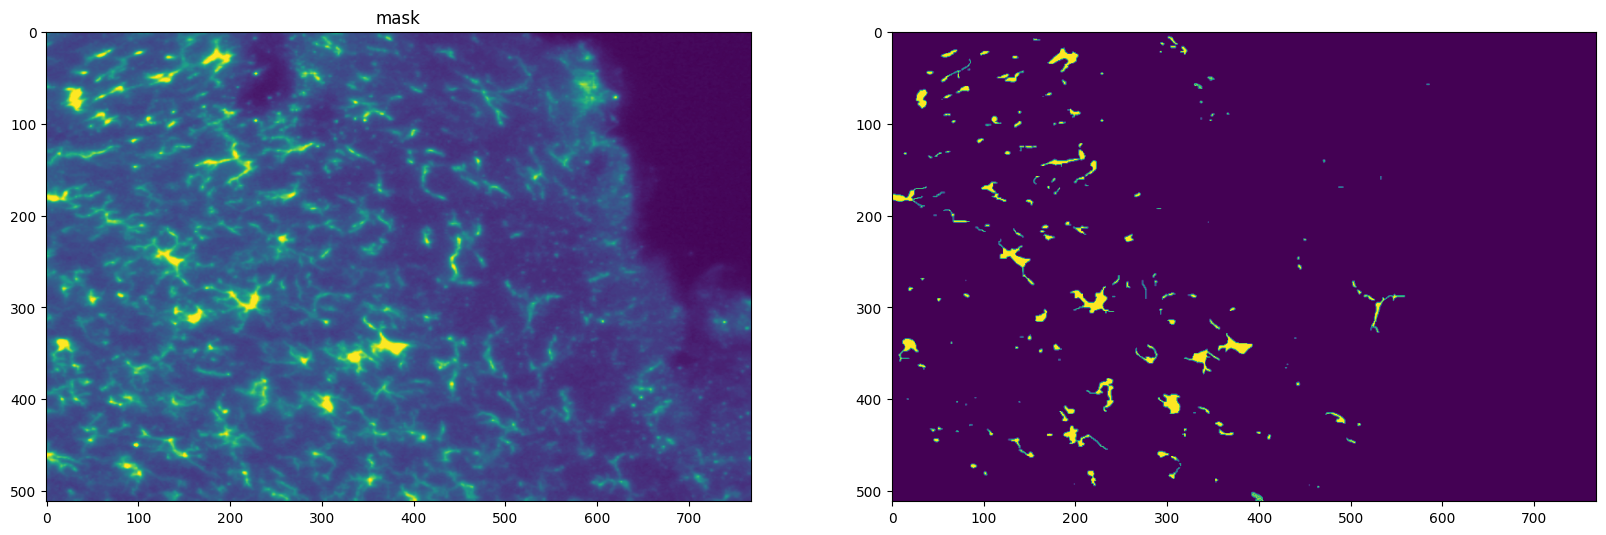

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.squeeze(image_data[78]))
ax[0].set_title('image')
ax[1].imshow(np.squeeze(mask_data[78]))
ax[0].set_title('mask')
fig.show()

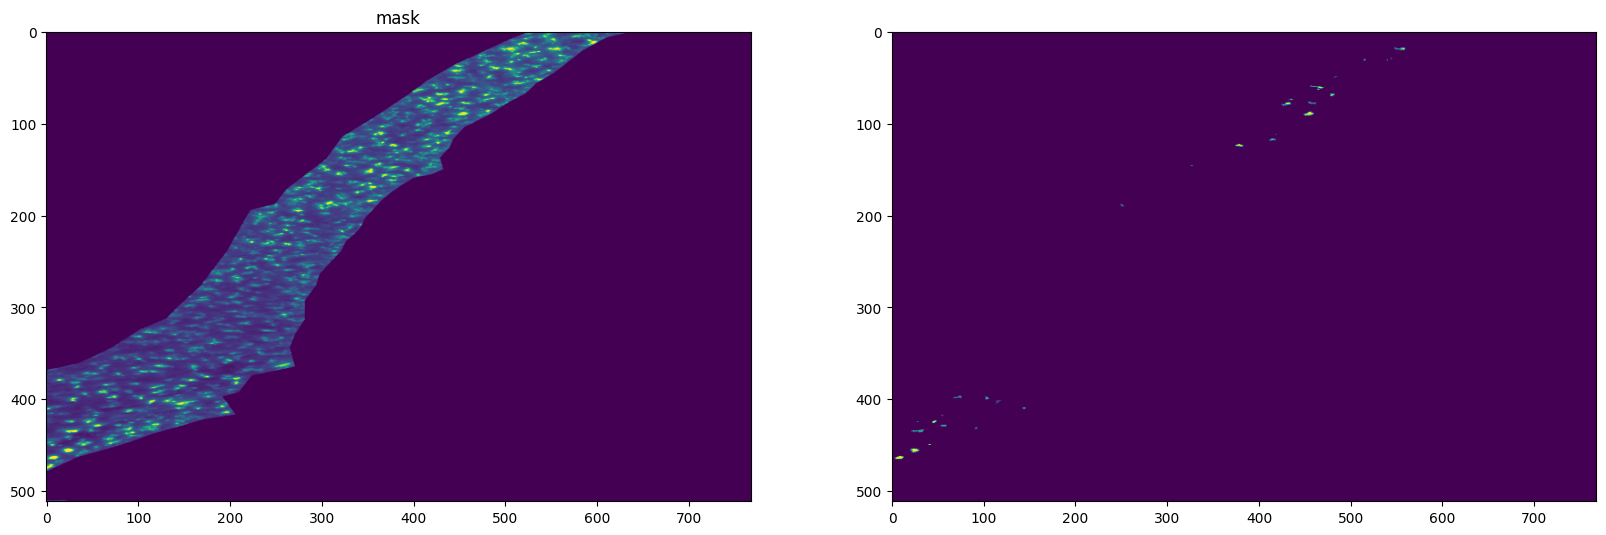

In [13]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(np.squeeze(image_data[95]))
ax[0].set_title('image')
ax[1].imshow(np.squeeze(mask_data[95]))
ax[0].set_title('mask')
fig.show()

In [21]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.losses import categorical_crossentropy
from keras.metrics import binary_accuracy
mask_data_categorical = to_categorical(mask_data, num_classes=2)
# U-net model
s = Input((image_data.shape[1], image_data.shape[2], image_data.shape[3]))
# Contraction path
c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)
c1 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.3)(c2)
c2 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.4)(c3)
c3 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

# Expansive path
u4 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c3)
u4 = concatenate([u4, c2])
c4 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
c4 = Dropout(0.4)(c4)
c4 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

u5 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c4)
u5 = concatenate([u5, c1], axis=3)
c5 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

model = Model(inputs=[s], outputs=[outputs])
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=[binary_accuracy])
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_44 (Conv2D)             (None, 512, 768, 8)  80          ['input_5[0][0]']                
                                                                                                  
 dropout_20 (Dropout)           (None, 512, 768, 8)  0           ['conv2d_44[0][0]']              
                                                                                                  
 conv2d_45 (Conv2D)             (None, 512, 768, 8)  584         ['dropout_20[0][0]']       

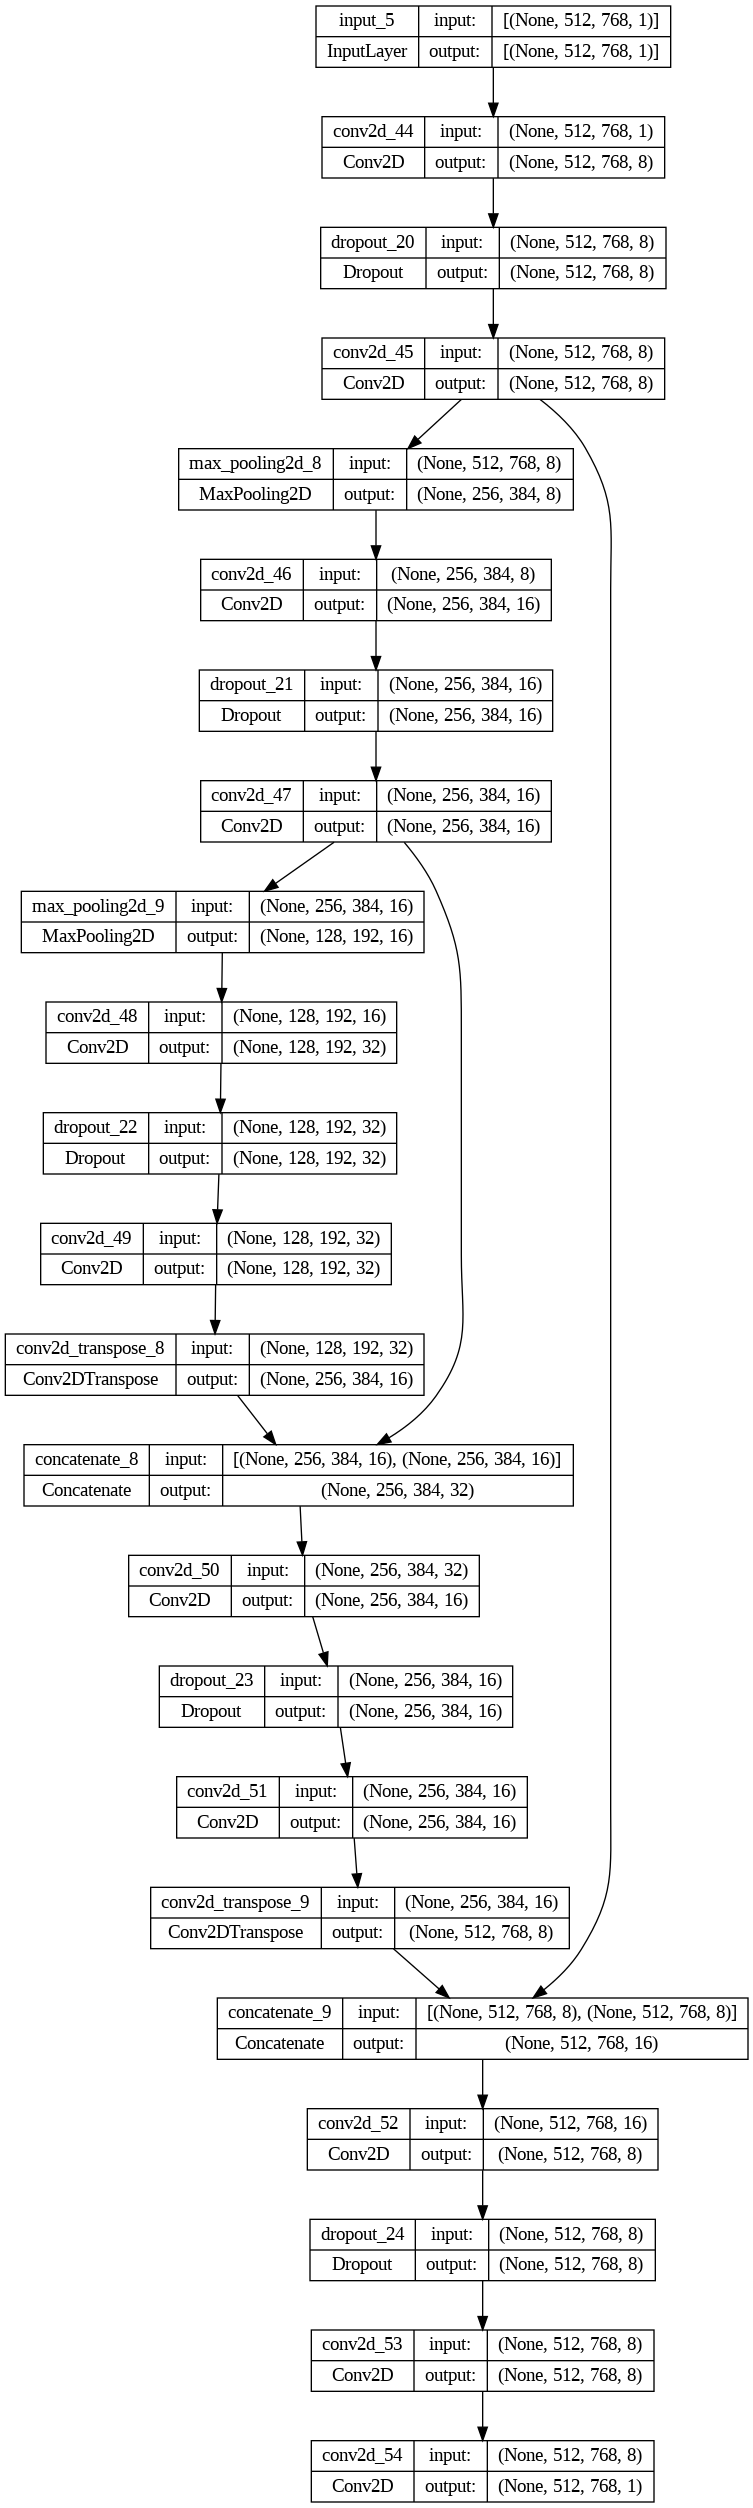

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(image_data, mask_data, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
'''
# Convert labels to one-hot encoding
num_classes = 3  # Number of classes
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)
'''
print('train data size:', X_train.shape[0])
print('validation data size:', X_val.shape[0])
print('test data size:', X_test.shape[0])

train data size: 145
validation data size: 17
test data size: 41


In [24]:
history = model.fit(x = X_train,
                    y = y_train,
                    batch_size = 8,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)],
                    validation_data = (X_val, y_val),
                    verbose = 1,
                    epochs = 100)

Epoch 1/100
19/19 [==============================] - 40s 2s/step - loss: 0.6243 - binary_accuracy: 0.8336 - val_loss: 0.3324 - val_binary_accuracy: 0.9889
Epoch 2/100
19/19 [==============================] - 5s 251ms/step - loss: 0.1543 - binary_accuracy: 0.9790 - val_loss: 0.0676 - val_binary_accuracy: 0.9889
Epoch 3/100
19/19 [==============================] - 5s 253ms/step - loss: 0.0487 - binary_accuracy: 0.9888 - val_loss: 0.0289 - val_binary_accuracy: 0.9889
Epoch 4/100
19/19 [==============================] - 5s 253ms/step - loss: 0.0306 - binary_accuracy: 0.9889 - val_loss: 0.0252 - val_binary_accuracy: 0.9889
Epoch 5/100
19/19 [==============================] - 5s 252ms/step - loss: 0.0265 - binary_accuracy: 0.9889 - val_loss: 0.0262 - val_binary_accuracy: 0.9889
Epoch 6/100
19/19 [==============================] - 5s 257ms/step - loss: 0.0246 - binary_accuracy: 0.9889 - val_loss: 0.0228 - val_binary_accuracy: 0.9889
Epoch 7/100
19/19 [==============================] - 5s 254m

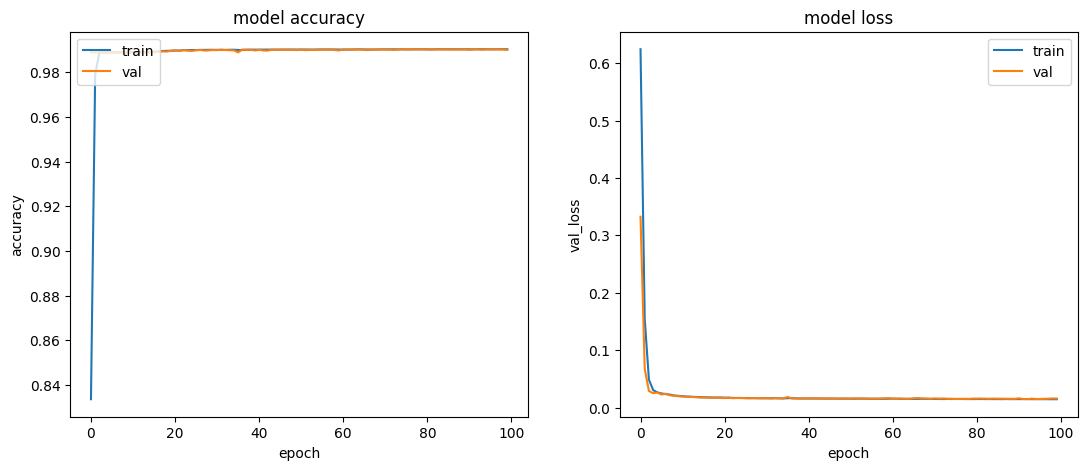

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

ax[0].plot(history.history['binary_accuracy'])
ax[0].plot(history.history['val_binary_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('val_loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper right')

fig.show()

1/1 [==============================] - 0s 177ms/step


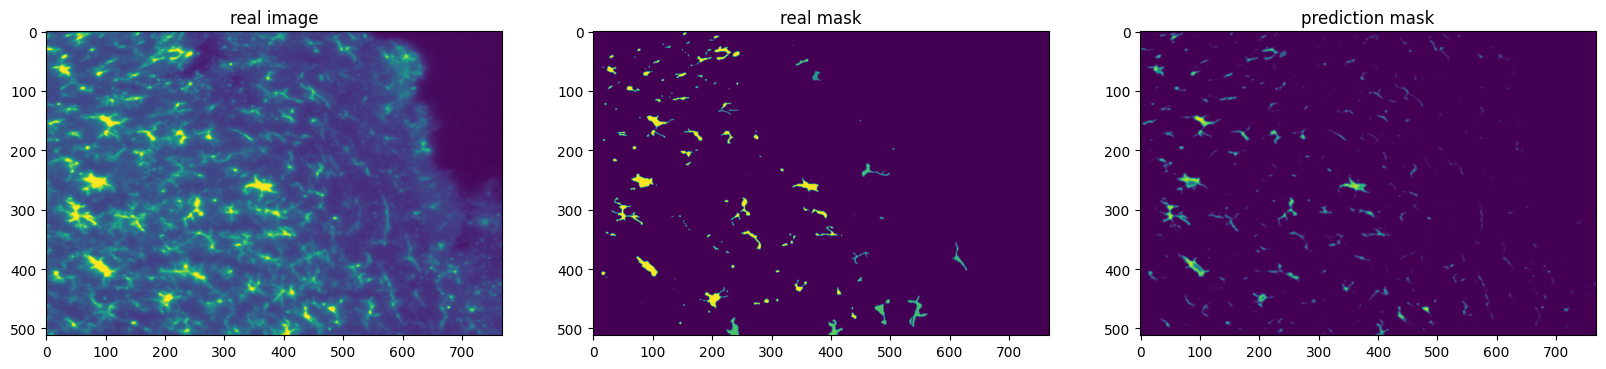

In [27]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 23ms/step


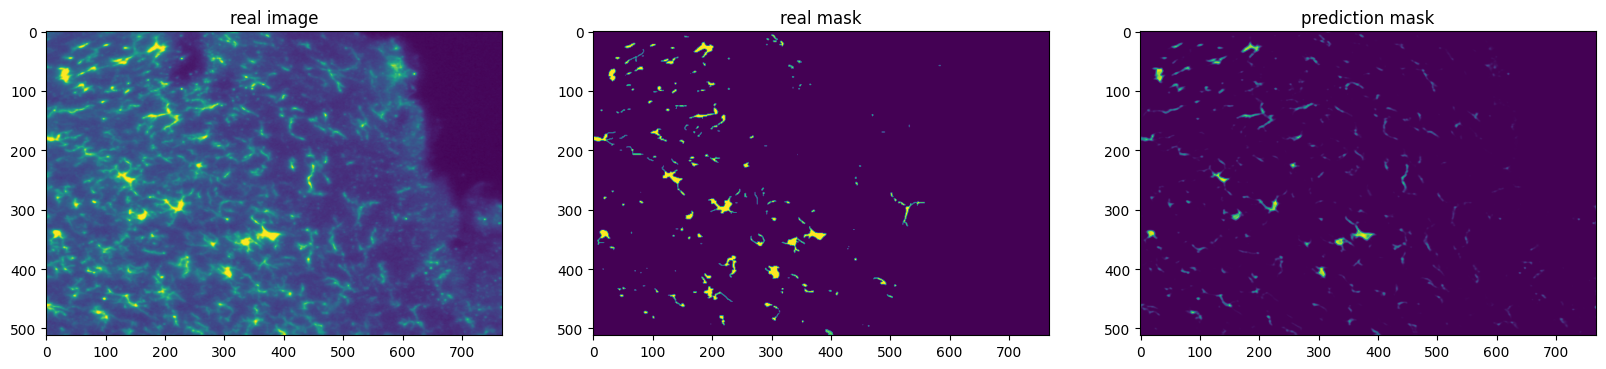

In [28]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 20ms/step


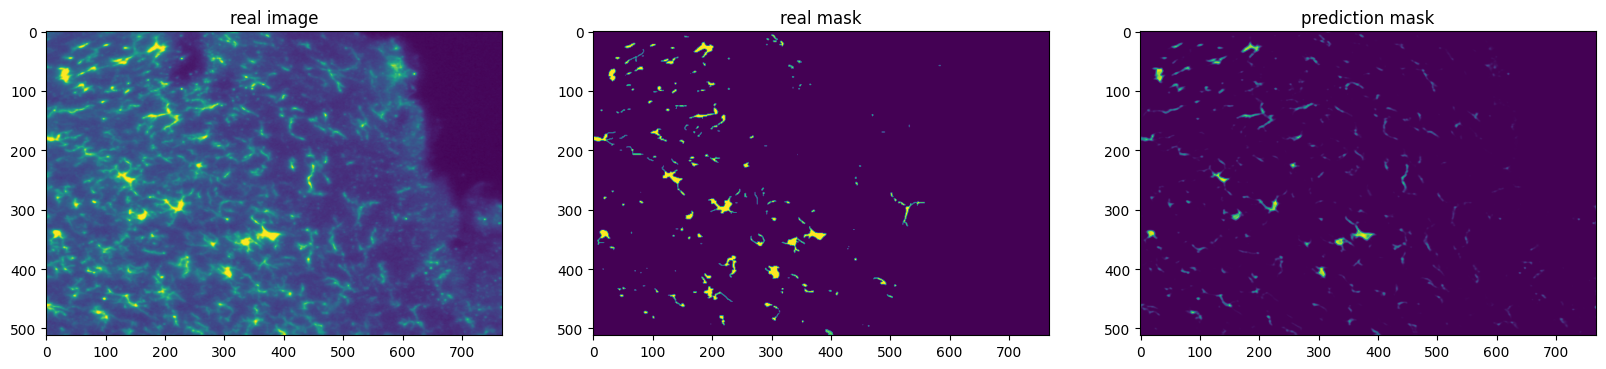

In [29]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 20ms/step


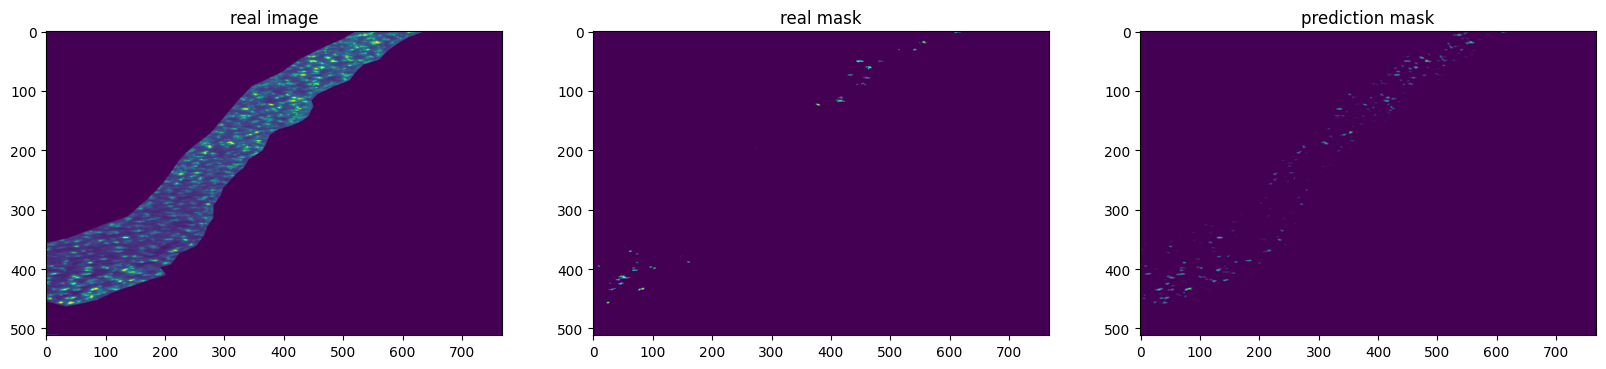

In [30]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 28ms/step


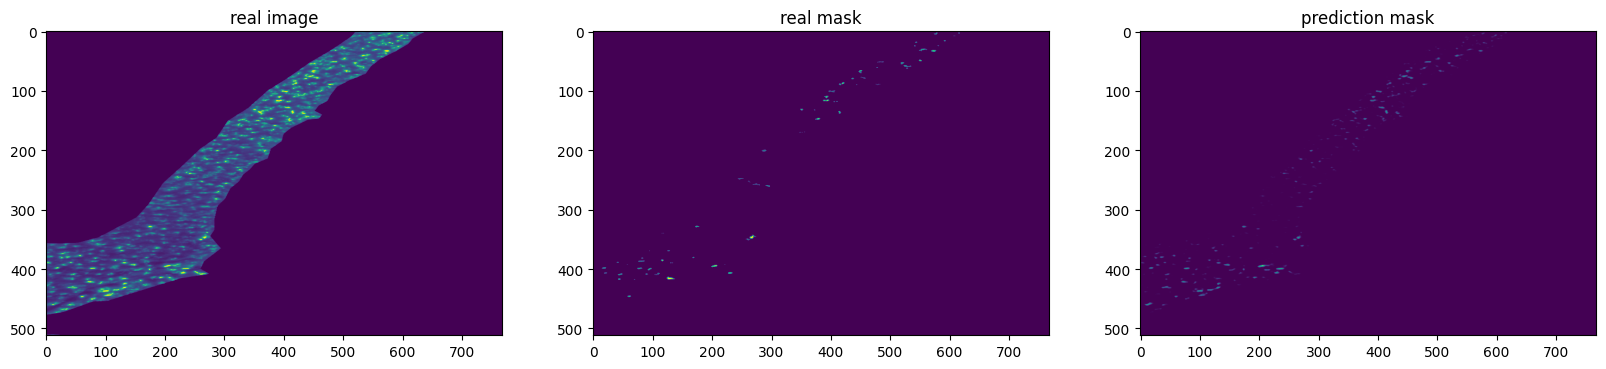

In [31]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 22ms/step


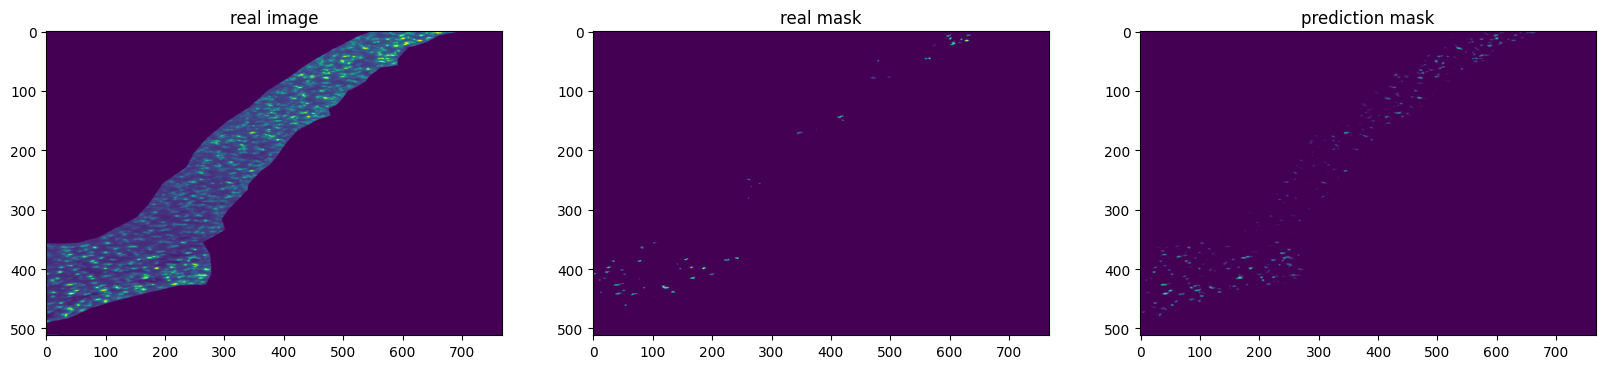

In [32]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

1/1 [==============================] - 0s 21ms/step


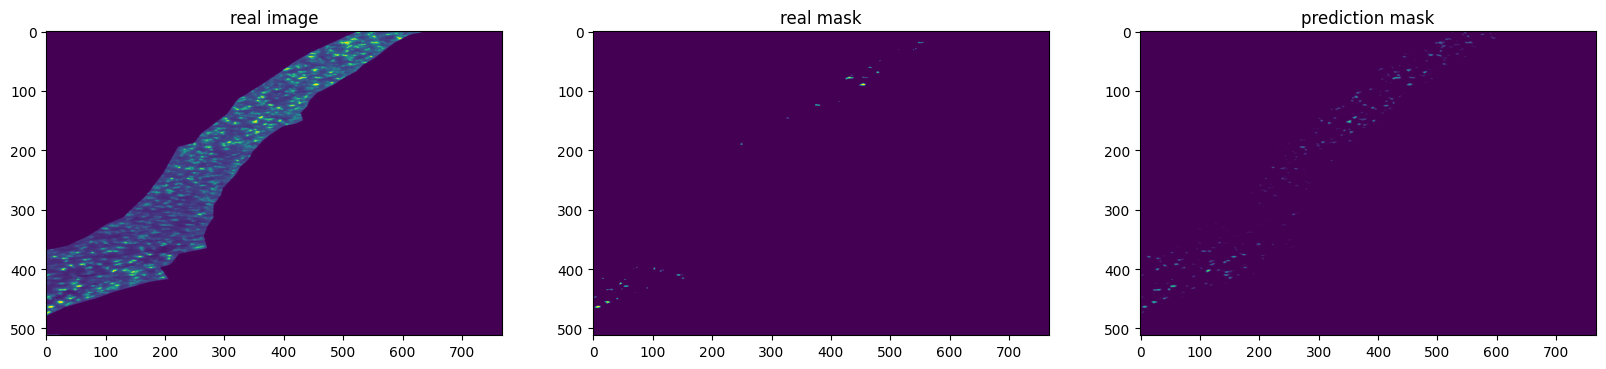

In [33]:
rndm_img = np.random.randint(0,len(X_test))

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(np.squeeze(X_test[rndm_img]))
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]))
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt))
ax[2].set_title('prediction mask')

fig.show()

In [ ]:
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 20ms/step


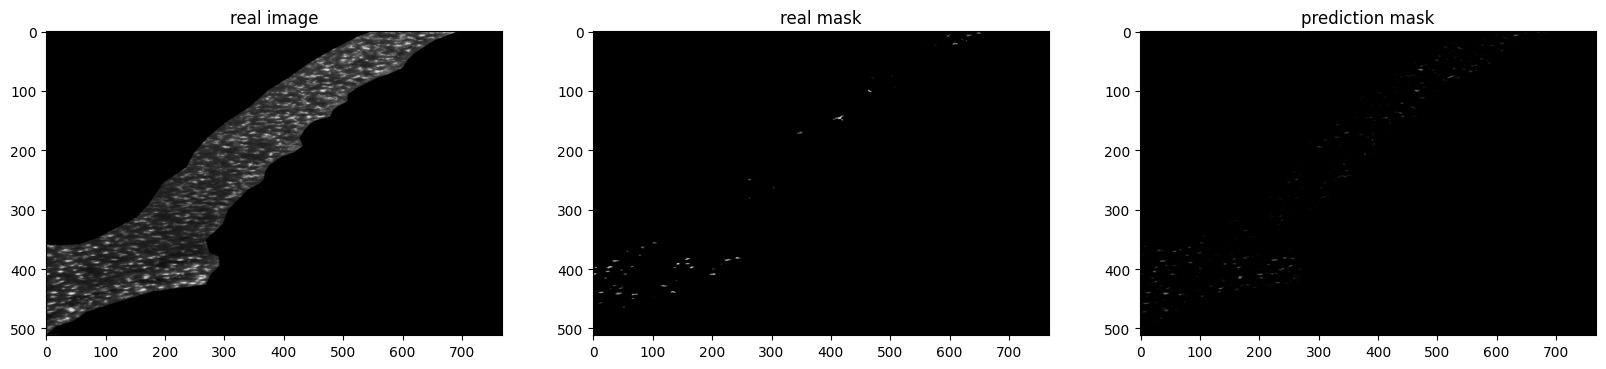

In [34]:
rndm_img = np.random.randint(0, len(X_test))

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(np.squeeze(X_test[rndm_img]), cmap='gray', vmin=0, vmax=1)
ax[0].set_title('real image')

ax[1].imshow(np.squeeze(y_test[rndm_img]), cmap='gray', vmin=0, vmax=1)
ax[1].set_title('real mask')

test_img = np.expand_dims(X_test[rndm_img], axis=0)
rslt = model.predict(test_img)[0]
ax[2].imshow(np.squeeze(rslt), cmap='gray', vmin=0, vmax=1)
ax[2].set_title('prediction mask')

plt.show()
